In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
f=h5py.File(r'features_database.h5', 'r')
print(list(f.keys()))
x = f['x'][:,:,:]
print('(samples, timesteps, features)', x.shape)

['x']
(samples, timesteps, features) (26, 127, 7)


In [3]:
nsamples, nx, ny = x.shape
d2_x = x.reshape((nsamples,nx*ny))

In [6]:
scaler = StandardScaler()
scaler.fit(d2_x)
scaled_data = scaler.transform(d2_x)

In [7]:
scaled_data

array([[-0.7748531 , -0.59336901, -0.56461661, ...,  0.11605285,
        -1.03232044,  0.16619385],
       [-1.47623321,  1.74714384, -0.26142155, ..., -2.02504325,
        -1.03757513,  0.17922123],
       [-0.68220187,  1.03983698, -1.37098329, ..., -0.10403847,
        -0.34287008, -1.85556473],
       ...,
       [ 0.49368627, -0.67516007, -0.71896647, ..., -0.5706464 ,
         0.69551665, -0.57638395],
       [ 1.06535692, -0.74849501, -1.08032358, ...,  0.7339762 ,
         1.70379596,  2.33031393],
       [ 1.06535692, -0.74849501, -1.08032358, ...,  0.7339762 ,
         1.70379596,  2.33031393]])

In [8]:
components = min(26, 2)
pca = PCA(n_components=components, svd_solver='full')
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_new = pca.inverse_transform(x_pca)
print("original shape:   ", scaled_data.shape)
print("transformed shape:", x_pca.shape)

original shape:    (26, 889)
transformed shape: (26, 2)


Text(0, 0.5, 'Second Principal Component')

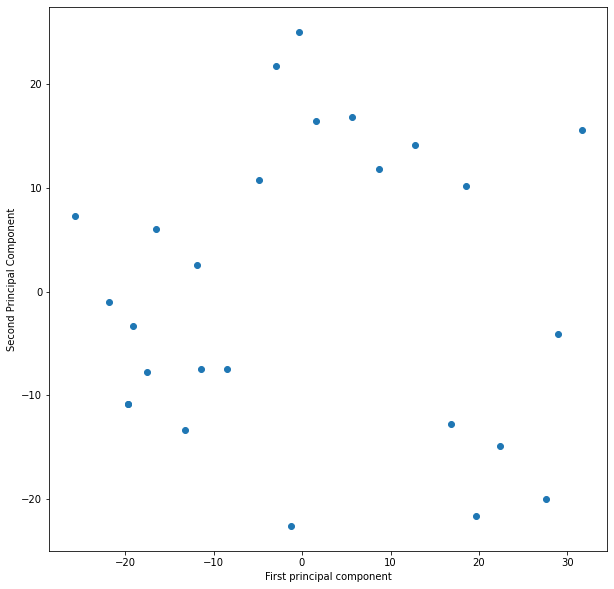

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [10]:
pca.components_

array([[-0.04188311,  0.0277799 , -0.01707885, ..., -0.02138968,
        -0.04850778, -0.01544908],
       [-0.00302822,  0.01640283,  0.04826555, ...,  0.02122738,
        -0.03385308, -0.00264557]])

In [11]:
path = f'cut'
filelist =[]
digits =[]
digits_int =[]
for file in glob.glob(f'{path}\\*.c3d',recursive = True):
    filelist.append(file[4:-4].replace("_", ""))
    digits.append(file[4:-7])

for ele in digits:
    digits_int.append(1) if ele=='degeneration' else digits_int.append(0)  

ValueError: 'c' argument has 27 elements, which is inconsistent with 'x' and 'y' with size 26.

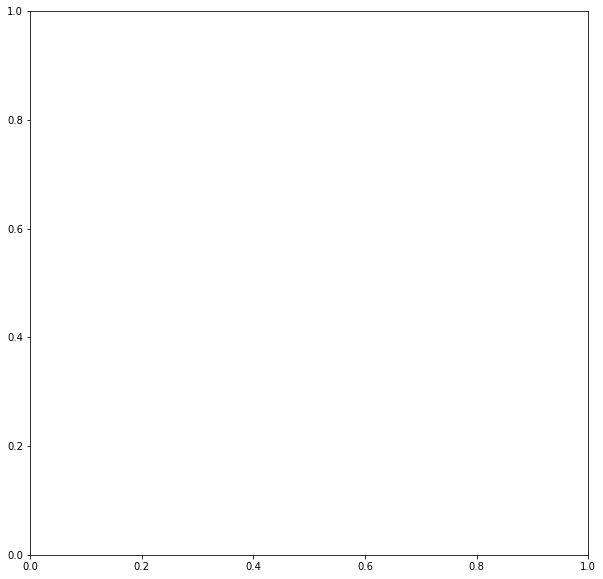

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=digits_int, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap("Spectral", 2), s=60)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Principal Component Analysis of Human GAIT",fontsize=20)
targets = ['degeneration', 'healthy']
plt.colorbar();

<li>Podział na chorych(fioletowy) i zdrowych(czerwony). Klasyfikator rozróżnił dwie oczekiwane klasy. Nie są one idealnie widoczne, lecz po naniesienu kolorów widać skupiska elementów danej klasy.
<li>Problem w dokładniejszych wysunięciu wniosków spowodowany jest przygotowaniem za małej bazy danych, która nie pozwala nam na dokładniejszą analizę.


In [13]:
features = ['jrd', 'jra']
features

['jrd', 'jra']

<AxesSubplot:>

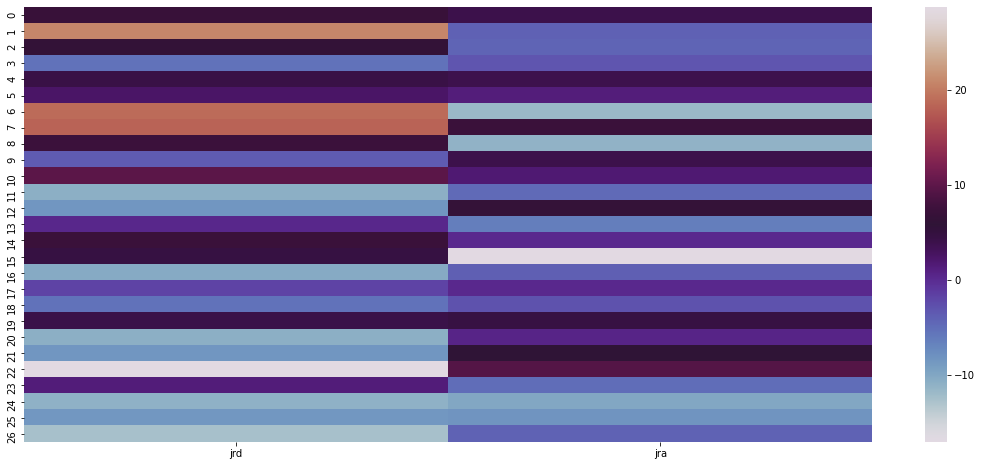

In [14]:
map= pd.DataFrame(x_pca,columns=features)
plt.figure(figsize=(19,8))
sns.heatmap(map,cmap='twilight')

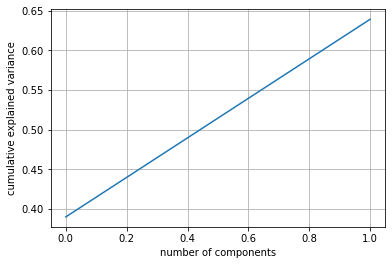

In [15]:
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

In [16]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      (explained_variance)  )

Components =  2 ;
Total explained variance =  [0.39004021 0.2493428 ]
